# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Set date
today = date.today()
date_today = today.strftime("%d/%m/%Y")

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations (change size back --> size=1500)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.title())

# Print the city count to confirm sufficient count
len(cities)

1500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url
url = 'http://api.openweathermap.org/data/2.5/weather?q='

# Set empty list
temps = []
lats = []
humid = []
cloud = []
wind = []
no_info_cities = []

# Extract relevant data from API
for i in range(len(cities)):
    weather_data = requests.get(url+cities[i]+'&appid='+api_key+'&units=imperial').json()
    try:
        temps.append(weather_data['main']['temp'])
        lats.append(weather_data['coord']['lat'])
        humid.append(weather_data['main']['humidity'])
        cloud.append(weather_data['clouds']['all'])
        wind.append(weather_data['wind']['speed'])
        print(f'City {i}: {cities[i]} -- obtained data')
    except KeyError:
        no_info_cities.append(cities[i])
        print(f'City {i}: {cities[i]} -- no data found')
        continue
print('\nData Extraction Complete\n')
        
# Filter out all cities without the needed data
cities_clean = cities.copy()

for city in no_info_cities:
    cities_clean.remove(city)

City 0: New Norfolk -- obtained data
City 1: Same -- obtained data
City 2: Boende -- obtained data
City 3: Rio Claro -- obtained data
City 4: Rikitea -- obtained data
City 5: Nioro -- obtained data
City 6: Butaritari -- obtained data
City 7: Castro -- obtained data
City 8: Dhidhdhoo -- obtained data
City 9: Shulan -- obtained data
City 10: Ushuaia -- obtained data
City 11: Ucluelet -- obtained data
City 12: Mareeba -- obtained data
City 13: Clyde River -- obtained data
City 14: Mataura -- obtained data
City 15: Merauke -- obtained data
City 16: Bartlesville -- obtained data
City 17: Hobart -- obtained data
City 18: Tiksi -- obtained data
City 19: Along -- obtained data
City 20: Port Hardy -- obtained data
City 21: Atuona -- obtained data
City 22: Chokurdakh -- obtained data
City 23: Chernyshevskiy -- obtained data
City 24: Qandala -- obtained data
City 25: Sekoma -- obtained data
City 26: Ushuaia -- obtained data
City 27: Sibolga -- obtained data
City 28: Bluff -- obtained data
City 29

City 229: Bathsheba -- obtained data
City 230: Bluff -- obtained data
City 231: Qaanaaq -- obtained data
City 232: Kaitangata -- obtained data
City 233: Grand Gaube -- obtained data
City 234: San Quintin -- obtained data
City 235: Rikitea -- obtained data
City 236: Bambous Virieux -- obtained data
City 237: Bambous Virieux -- obtained data
City 238: Port Elizabeth -- obtained data
City 239: Butaritari -- obtained data
City 240: Provideniya -- obtained data
City 241: Mullaitivu -- no data found
City 242: Punta Arenas -- obtained data
City 243: Puerto Ayora -- obtained data
City 244: Ushuaia -- obtained data
City 245: Caravelas -- obtained data
City 246: Rikitea -- obtained data
City 247: Cape Town -- obtained data
City 248: Dikson -- obtained data
City 249: Valday -- obtained data
City 250: Puerto Ayora -- obtained data
City 251: Sao Filipe -- obtained data
City 252: Qaanaaq -- obtained data
City 253: Provideniya -- obtained data
City 254: East London -- obtained data
City 255: Avarua -

City 453: Coquimbo -- obtained data
City 454: Lebu -- obtained data
City 455: Jamestown -- obtained data
City 456: Dikson -- obtained data
City 457: Norman Wells -- obtained data
City 458: Rikitea -- obtained data
City 459: North Bend -- obtained data
City 460: Bredasdorp -- obtained data
City 461: Kapaa -- obtained data
City 462: Zarechnyy -- obtained data
City 463: Kloulklubed -- obtained data
City 464: Mahebourg -- obtained data
City 465: Ndiekro -- no data found
City 466: Ust-Omchug -- obtained data
City 467: Hofn -- obtained data
City 468: Satitoa -- no data found
City 469: Victoria -- obtained data
City 470: Cidreira -- obtained data
City 471: Apodi -- obtained data
City 472: Puerto Ayora -- obtained data
City 473: Ust-Kulom -- obtained data
City 474: Puerto Ayora -- obtained data
City 475: Palu -- obtained data
City 476: Hithadhoo -- obtained data
City 477: Punta Arenas -- obtained data
City 478: Riacho De Santana -- obtained data
City 479: Deputatskiy -- obtained data
City 480:

City 679: Albany -- obtained data
City 680: Xiangxiang -- obtained data
City 681: Ferrol -- obtained data
City 682: Nizhneyansk -- no data found
City 683: Butaritari -- obtained data
City 684: Kloulklubed -- obtained data
City 685: Port Hardy -- obtained data
City 686: Hermanus -- obtained data
City 687: Hillsboro -- obtained data
City 688: Sorong -- obtained data
City 689: Dingle -- obtained data
City 690: Hilo -- obtained data
City 691: Gigmoto -- obtained data
City 692: Bluff -- obtained data
City 693: Mangrol -- obtained data
City 694: Rikitea -- obtained data
City 695: Tuktoyaktuk -- obtained data
City 696: Kautokeino -- obtained data
City 697: Hilo -- obtained data
City 698: Hermanus -- obtained data
City 699: Bluff -- obtained data
City 700: Punta Arenas -- obtained data
City 701: Atuona -- obtained data
City 702: Kifri -- obtained data
City 703: San Patricio -- obtained data
City 704: Barawe -- no data found
City 705: Lorengau -- obtained data
City 706: Hobart -- obtained data


City 905: Busselton -- obtained data
City 906: Yellowknife -- obtained data
City 907: Ternate -- obtained data
City 908: Butaritari -- obtained data
City 909: Lagoa -- obtained data
City 910: Lebu -- obtained data
City 911: Virginia Beach -- obtained data
City 912: New Norfolk -- obtained data
City 913: Hermanus -- obtained data
City 914: Flin Flon -- obtained data
City 915: Balvi -- obtained data
City 916: Benicarlo -- obtained data
City 917: Krasnoselkup -- no data found
City 918: New Norfolk -- obtained data
City 919: Ushuaia -- obtained data
City 920: Ancud -- obtained data
City 921: Port Hardy -- obtained data
City 922: Nantucket -- obtained data
City 923: Barentsburg -- no data found
City 924: Honiara -- obtained data
City 925: Jamestown -- obtained data
City 926: Viedma -- obtained data
City 927: Bambanglipuro -- obtained data
City 928: Illoqqortoormiut -- no data found
City 929: Cockburn Town -- obtained data
City 930: Butaritari -- obtained data
City 931: Balkhash -- obtained 

City 1126: Belushya Guba -- no data found
City 1127: Kaitangata -- obtained data
City 1128: Hermanus -- obtained data
City 1129: Qaanaaq -- obtained data
City 1130: Jamestown -- obtained data
City 1131: Constitucion -- obtained data
City 1132: Chupa -- obtained data
City 1133: Maiduguri -- obtained data
City 1134: Ponta Do Sol -- obtained data
City 1135: Sitka -- obtained data
City 1136: Ushuaia -- obtained data
City 1137: Gusinoye Ozero -- obtained data
City 1138: Nikolskoye -- obtained data
City 1139: Ushuaia -- obtained data
City 1140: Qaanaaq -- obtained data
City 1141: Dong Xoai -- obtained data
City 1142: Beaverlodge -- obtained data
City 1143: Upernavik -- obtained data
City 1144: Hobart -- obtained data
City 1145: Sakaiminato -- obtained data
City 1146: Qaanaaq -- obtained data
City 1147: Half Moon Bay -- obtained data
City 1148: Katsuura -- obtained data
City 1149: Busselton -- obtained data
City 1150: Grand River South East -- no data found
City 1151: Atuona -- obtained data


City 1346: Soc Trang -- obtained data
City 1347: Avarua -- obtained data
City 1348: Hermanus -- obtained data
City 1349: Sunland Park -- obtained data
City 1350: Albany -- obtained data
City 1351: Vaini -- obtained data
City 1352: Barrow -- obtained data
City 1353: Rikitea -- obtained data
City 1354: Sapao -- no data found
City 1355: Ayan -- obtained data
City 1356: Ushuaia -- obtained data
City 1357: Werota -- obtained data
City 1358: Mar Del Plata -- obtained data
City 1359: Hualmay -- obtained data
City 1360: Saint-Louis -- obtained data
City 1361: Qaanaaq -- obtained data
City 1362: Vaitape -- obtained data
City 1363: Ancud -- obtained data
City 1364: East London -- obtained data
City 1365: Raudeberg -- obtained data
City 1366: Verkhnyaya Inta -- obtained data
City 1367: Taolanaro -- no data found
City 1368: Bluff -- obtained data
City 1369: Tuktoyaktuk -- obtained data
City 1370: Hermanus -- obtained data
City 1371: Carnarvon -- obtained data
City 1372: Bluff -- obtained data
City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Building DataFrame
data = pd.DataFrame({'City':cities_clean, 'Latitude':lats, 'Temperature':temps, 
                     'Humidity':humid, 'Cloudiness':cloud, 'Wind Speed':wind})

# Export DataFrame
data.to_csv(output_data_file)

data.dtypes

City            object
Latitude       float64
Temperature    float64
Humidity         int64
Cloudiness       int64
Wind Speed     float64
dtype: object

In [5]:
data.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,New Norfolk,-42.78,51.10,58,75,23.04
1,Same,-9.00,86.16,36,17,8.68
2,Boende,-0.28,71.08,91,100,1.95
3,Rio Claro,-22.41,66.20,88,22,12.75
4,Rikitea,-23.12,77.59,72,0,3.76


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

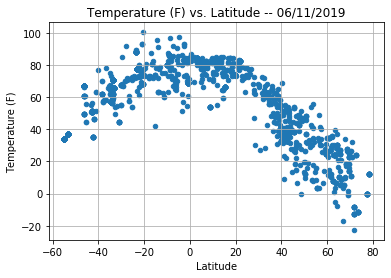

In [10]:
# Plot: Temperature (F) vs. Latitude
data.plot.scatter(1,2)
plt.title(f'Temperature (F) vs. Latitude -- {date_today}')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid('both')
plt.savefig('Temperature (F) vs Latitude.png')
plt.show()

#### Latitude vs. Humidity Plot

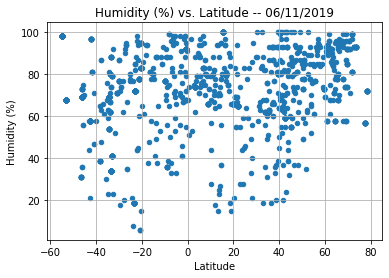

In [11]:
# Plot: Humidity(%) vs Latitude
data.plot.scatter(1,3)
plt.title(f'Humidity (%) vs. Latitude -- {date_today}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid('both')
plt.savefig('Humidity (%) vs Latitude.png')
plt.show()

#### Latitude vs. Cloudiness Plot

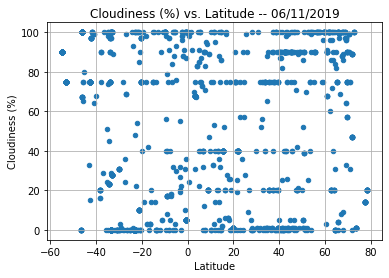

In [12]:
# Plot: Cloudiness (%) vs. Latitude
data.plot.scatter(1,4)
plt.title(f'Cloudiness (%) vs. Latitude -- {date_today}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid('both')
plt.savefig('Cloudiness (%) vs Latitude.png')
plt.show()

#### Latitude vs. Wind Speed Plot

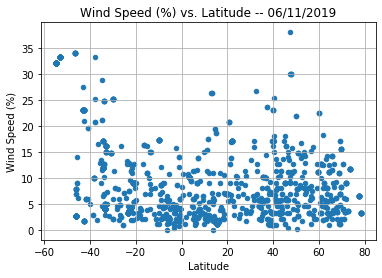

In [13]:
# Plot: Wind Speed (%) vs. Latitude
data.plot.scatter(1, 5)
plt.title(f'Wind Speed (%) vs. Latitude -- {date_today}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.grid('both')
plt.savefig('Wind Speed (%) vs Latitude.png')
plt.show()

# Data Analysis:

1) Temperature clearly decreases as you move away from 0 degrees latitude (the equator)

2) There is little to no correlation between latitude and cloudiness

3) There may be a weak relationship between latitude and humidity, in that there looks to be very few cities with low humidity near the equator, and they become more frequent as they get closer to the poles 